##**Importing libraries**

In [ ]:
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import tensorflow as tf

##**Preparing linarly saperable data**

In [ ]:
n = 1000
#Creating x_1 and x_2 for male data
x_1_male = np.random.normal(loc = 15, scale = 1, size = n)
x_2_male = np.random.normal(loc = 15, scale = 1, size = n)

#Creating x_1 and x_2 for female data
x_1_female = np.random.normal(loc = 5, scale = 1, size = n)
x_2_female = np.random.normal(loc = 5, scale = 1, size = n)

In [ ]:
x_1 = np.concatenate((x_1_male, x_1_female))
x_2 = np.concatenate((x_2_male, x_2_female))

#Preparing x and y for traininig
x = np.stack((x_1, x_2), axis = 1)
y = np.concatenate((np.ones(n), np.zeros(n)))

from sklearn.utils import shuffle
x, y = shuffle(x, y)

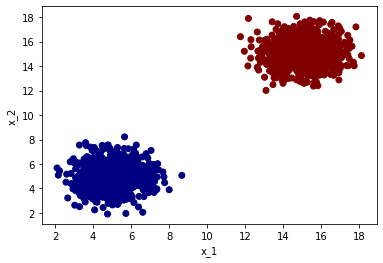

In [ ]:
#Ploting the male and female data
plt.scatter(x= x[:,0], y= x[:, 1], c = y, cmap='jet')
plt.xlabel('x_1')
plt.ylabel('x_2')
plt.show()

# **Creating an SVM model using keras layers**

In [ ]:
def SVM():
    model = tf.keras.Sequential([
                                    tf.keras.layers.Input(shape= 2),
                                    tf.keras.layers.Dense(1, activation = None)
    ])
    model.compile(loss = 'hinge', optimizer = tf.keras.optimizers.Adam(0.01), metrics = ['accuracy'])
    return model

In [ ]:
model.summary()

In [ ]:
model = SVM()
model.fit(x= x, y = y, epochs = 50)

#**Ploting the predicted values**

In [ ]:
pred_y = model.predict(x)
male_pred = x[np.where(pred_y > 0)[0]]
female_pred = x[np.where(pred_y < 0)[0]]
female_pred.shape

(1000, 2)

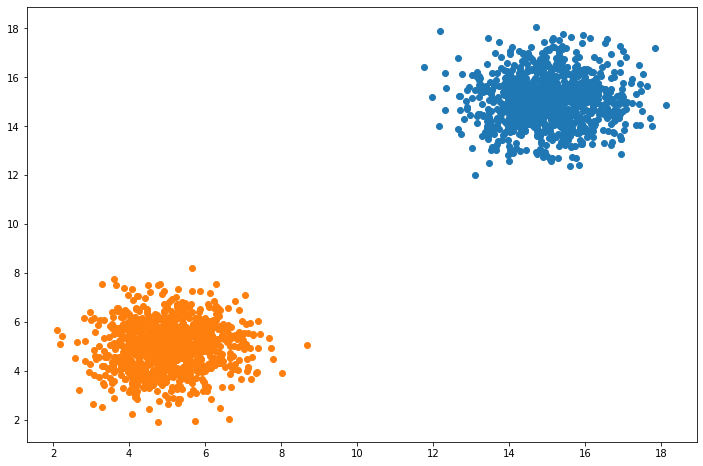

In [ ]:
fig = plt.figure(figsize= (12, 8))
plt.scatter(x= male_pred[:,0], y= male_pred[:, 1])
plt.scatter(x= female_pred[:,0], y= female_pred[:, 1])
plt.show()

#**Ploting the sample vectors** 

In [ ]:
mm= min(pred_y[pred_y > 0])
ff= max(pred_y[pred_y < 0])
male_sv_ind, _ = np.where(pred_y == mm)
female_sv_ind, _ = np.where(pred_y == ff)
male_sv = x[male_sv_ind]
female_sv = x[female_sv_ind]

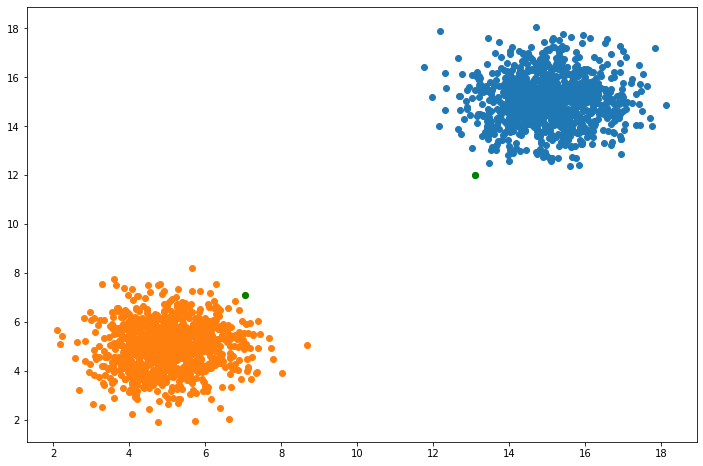

In [ ]:
fig = plt.figure(figsize= (12, 8))
plt.scatter(x= male_pred[:,0], y= male_pred[:, 1])
plt.scatter(x= female_pred[:,0], y= female_pred[:, 1])
plt.scatter(male_sv[:,0], male_sv[:,1], c = 'green')
plt.scatter(female_sv[:,0], female_sv[:,1], c = 'green')
plt.show()

#**Distinguishing the gutter space**

In [ ]:
xx, yy = np.meshgrid(np.linspace(0, 20, 1000), np.linspace(0, 20, 1000))

In [ ]:
z = model.predict(np.stack( (xx.ravel(), yy.ravel() ), axis= 1))
z[(z > ff) & (z< mm)] = 1
z[z!=1] = -1
z= z.reshape(xx.shape)

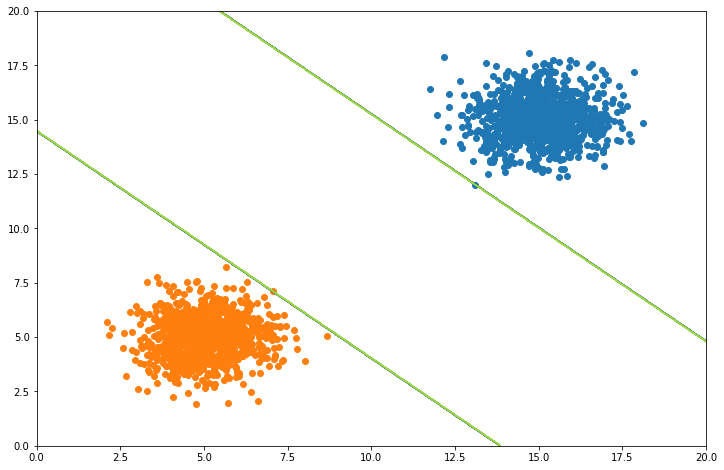

In [ ]:
fig = plt.figure(figsize= (12, 8))
plt.contour(xx, yy, z)
plt.scatter(x= male_pred[:,0], y= male_pred[:, 1])
plt.scatter(x= female_pred[:,0], y= female_pred[:, 1])
plt.show()